### How To Break Into the Field



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud, STOPWORDS
from bokeh.plotting import figure, output_file, show
import plotly.plotly as py
import cufflinks as cf
%matplotlib inline

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
df_2017 = pd.read_csv('./survey_results_public2017.csv',low_memory=False)
schema = pd.read_csv('./survey_results_schema2017.csv')
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,"Computer science, computer engineering, or sof...","Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,"Another engineering discipline (ex. civil, ele...","Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,"Computer science, computer engineering, or sof...",Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_2018 = pd.read_csv('./survey_results_public2018.csv',low_memory=False)
schema = pd.read_csv('./survey_results_schema2018.csv')
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [17]:
df_2019 = pd.read_csv('./survey_results_public2019.csv')
schema = pd.read_csv('./survey_results_schema2019.csv')
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In this analysis, we are interested in learning what kind of people spend time on stack overflow and how it's been changing over the past three years.

First, in order to answer the question posed above, i will select only relevant columns from each year's survey data for easier data processing

In [18]:
df_new_2017=df_2017[['Respondent','EmploymentStatus','ProgramHobby','Country','MajorUndergrad','CareerSatisfaction',
                    'StackOverflowAnswer']]
df_new_2017.rename(columns={'ProgramHobby':'Hobbyist','MajorUndergrad':'UndergradMajor',
                           'StackOverflowAnswer':'SOPartFreq'},inplace=True)
df_new_2017.loc[:,['Respondent']]=df_new_2017.loc[:,['Respondent']].astype(str)+'2017'
df_new_2017.rename(columns={'CareerSatisfaction':'CareerSatScore'},inplace=True)
df_new_2017['CareerSatisfaction']=df_new_2017['CareerSatScore'].apply(lambda x:'Extremely dissatisfied' if 0<=x<=2
                                                                      else ('Moderately dissatisfied' if x==3
                                                                           else ('Slightly dissatisfied' if x==4
                                                                                 else ('Neither satisfied nor dissatisfied' if x==5
                                                                                      else('Slightly satisfied' if x==6
                                                                                           else ('Moderately satisfied' if x==7
                                                                                                 else ('Extremely satisfied' if x>=8
                                                                                                       else np.NaN)))))))
df_new_2017.drop(columns=['CareerSatScore'],inplace=True)
df_new_2017['year']=2017

df_new_2017.head()

,Respondent,EmploymentStatus,Hobbyist,Country,UndergradMajor,SOPartFreq,CareerSatisfaction,year
0,12017,"Not employed, and not looking for work","Yes, both",United States,NaN,Several times,NaN,2017
1,22017,Employed part-time,"Yes, both",United Kingdom,"Computer science, computer engineering, or sof...",Several times,NaN,2017
2,32017,Employed full-time,"Yes, both",United Kingdom,"Computer science, computer engineering, or sof...",At least once each day,Extremely satisfied,2017
3,42017,Employed full-time,"Yes, both",United States,"Another engineering discipline (ex. civil, ele...",At least once each day,Slightly satisfied,2017
4,52017,Employed full-time,"Yes, I program as a hobby",Switzerland,"Computer science, computer engineering, or sof...",NaN,Slightly satisfied,2017


In [19]:
df_new_2018=df_2018[['Respondent','Employment','Hobby','Country','UndergradMajor','CareerSatisfaction',
                    'StackOverflowParticipate']]
df_new_2018.rename(columns={'Hobby':'Hobbyist','Employment':'EmploymentStatus','StackOverflowParticipate':'SOPartFreq'},
                   inplace=True)
df_new_2018['year']=2018
df_new_2018.loc[:,['Respondent']]=df_new_2018.loc[:,['Respondent']].astype(str)+'2018'
df_new_2018.head()

,Respondent,EmploymentStatus,Hobbyist,Country,UndergradMajor,CareerSatisfaction,SOPartFreq,year
0,12018,Employed part-time,Yes,Kenya,Mathematics or statistics,Extremely satisfied,I have never participated in Q&A on Stack Over...,2018
1,32018,Employed full-time,Yes,United Kingdom,"A natural science (ex. biology, chemistry, phy...",Neither satisfied nor dissatisfied,A few times per month or weekly,2018
2,42018,Employed full-time,Yes,United States,"Computer science, computer engineering, or sof...",Moderately satisfied,NaN,2018
3,52018,Employed full-time,No,United States,"Computer science, computer engineering, or sof...",Slightly dissatisfied,A few times per month or weekly,2018
4,72018,Employed full-time,Yes,South Africa,"Computer science, computer engineering, or sof...",Moderately satisfied,Less than once per month or monthly,2018


In [20]:
df_new_2019=df_2019[['Respondent','Employment','Hobbyist','Country','UndergradMajor','CareerSat','SOPartFreq']]
df_new_2019.rename(columns={'Employment':'EmploymentStatus','CareerSat':'CareerSatisfaction'},inplace=True)
df_new_2019['year']=2019
df_new_2019.loc[:,['Respondent']]=df_new_2019.loc[:,['Respondent']].astype(str)+'2019'
df_new_2019.head()

,Respondent,EmploymentStatus,Hobbyist,Country,UndergradMajor,CareerSatisfaction,SOPartFreq,year
0,12019,"Not employed, and not looking for work",Yes,United Kingdom,NaN,NaN,NaN,2019
1,22019,"Not employed, but looking for work",No,Bosnia and Herzegovina,NaN,NaN,A few times per month or weekly,2019
2,32019,Employed full-time,Yes,Thailand,Web development or web design,Slightly satisfied,Less than once per month or monthly,2019
3,42019,Employed full-time,No,United States,"Computer science, computer engineering, or sof...",Very satisfied,Less than once per month or monthly,2019
4,52019,Employed full-time,Yes,Ukraine,"Computer science, computer engineering, or sof...",Very dissatisfied,A few times per month or weekly,2019


In [21]:
survey_result=pd.concat([df_new_2017, df_new_2018,df_new_2019], axis=0)

survey_result.loc[survey_result['Hobbyist'].str.contains('Yes'),'Hobbyist']='Yes'
survey_result.sort_values(by=['CareerSatisfaction'],ascending=True,inplace=True)
survey_result.head()

,CareerSatisfaction,Country,EmploymentStatus,Hobbyist,Respondent,SOPartFreq,UndergradMajor,year
30553,Extremely dissatisfied,Germany,Employed full-time,No,434362018,Less than once per month or monthly,"Computer science, computer engineering, or sof...",2018
55947,Extremely dissatisfied,"Iran, Islamic Republic of...",Employed full-time,No,793902018,Daily or almost daily,"Computer science, computer engineering, or sof...",2018
27162,Extremely dissatisfied,Czech Republic,Employed full-time,Yes,386152018,A few times per month or weekly,"Another engineering discipline (ex. civil, ele...",2018
73174,Extremely dissatisfied,United Kingdom,"Independent contractor, freelancer, or self-em...",Yes,186232018,Less than once per month or monthly,"Computer science, computer engineering, or sof...",2018
73172,Extremely dissatisfied,United States,"Independent contractor, freelancer, or self-em...",No,185862018,NaN,"Computer science, computer engineering, or sof...",2018


In [22]:
survey_result_total=pd.DataFrame(survey_result.groupby([survey_result.year]).Respondent.nunique()).reset_index()
survey_result_total

,year,Respondent
0,2017,51392
1,2018,98855
2,2019,88883


In [23]:
#let's take a look at the employment status trend 
survey_result_employstat=pd.DataFrame(survey_result.groupby([survey_result.year,
                                                             survey_result.EmploymentStatus]).Respondent.nunique()).reset_index()
survey_result_employstat['pctn']=0
survey_result_employstat.loc[survey_result_employstat.year==2017,['pctn']]=survey_result_employstat.Respondent/51392
survey_result_employstat.loc[survey_result_employstat.year==2018,['pctn']]=survey_result_employstat.Respondent/98855
survey_result_employstat.loc[survey_result_employstat.year==2019,['pctn']]=survey_result_employstat.Respondent/88883
survey_result_employstat

,year,EmploymentStatus,Respondent,pctn
0,2017,Employed full-time,36148,0.703378
1,2017,Employed part-time,3180,0.061877
2,2017,I prefer not to say,1086,0.021132
3,2017,"Independent contractor, freelancer, or self-em...",5233,0.101825
4,2017,"Not employed, and not looking for work",2791,0.054308
5,2017,"Not employed, but looking for work",2786,0.054211
6,2017,Retired,168,0.003269
7,2018,Employed full-time,70495,0.713115
8,2018,Employed part-time,5380,0.054423
9,2018,"Independent contractor, freelancer, or self-em...",9282,0.093895


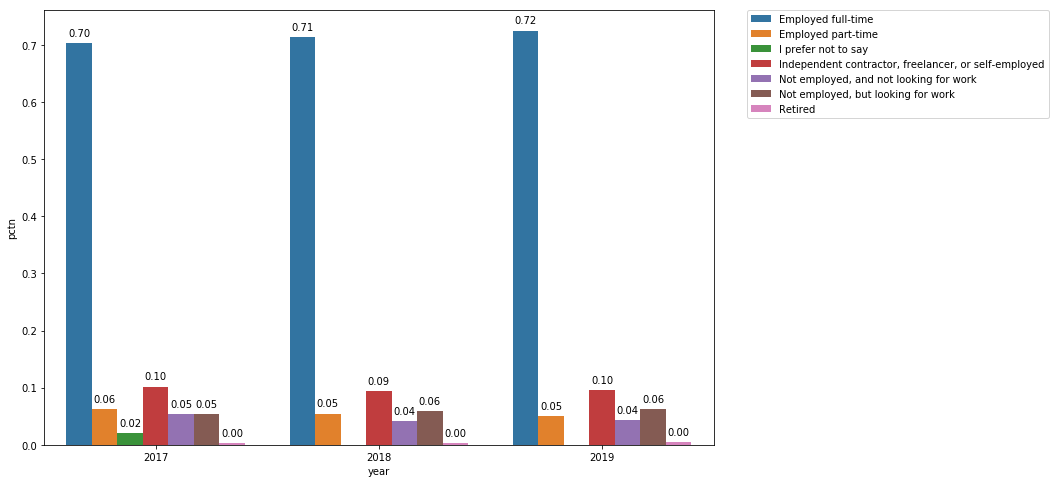

In [24]:
dims=(12,8)
fig,ax=plt.subplots(figsize=dims) 
fig1=sns.barplot(ax=ax,x="year", y="pctn", hue="EmploymentStatus", data=survey_result_employstat)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for p in fig1.patches:
    fig1.annotate(format(p.get_height(), '.2f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [25]:
#let's take a look at the trend of hobbyist
survey_result_hobby=pd.DataFrame(survey_result.groupby([survey_result.year,
                                                             survey_result.Hobbyist]).Respondent.nunique()).reset_index()
survey_result_hobby['pctn']=0
survey_result_hobby.loc[survey_result_hobby.year==2017,['pctn']]=survey_result_hobby.Respondent/51392
survey_result_hobby.loc[survey_result_hobby.year==2018,['pctn']]=survey_result_hobby.Respondent/98855
survey_result_hobby.loc[survey_result_hobby.year==2019,['pctn']]=survey_result_hobby.Respondent/88883

survey_result_hobby

,year,Hobbyist,Respondent,pctn
0,2017,No,9787,0.190438
1,2017,Yes,41605,0.809562
2,2018,No,18958,0.191776
3,2018,Yes,79897,0.808224
4,2019,No,17626,0.198306
5,2019,Yes,71257,0.801694


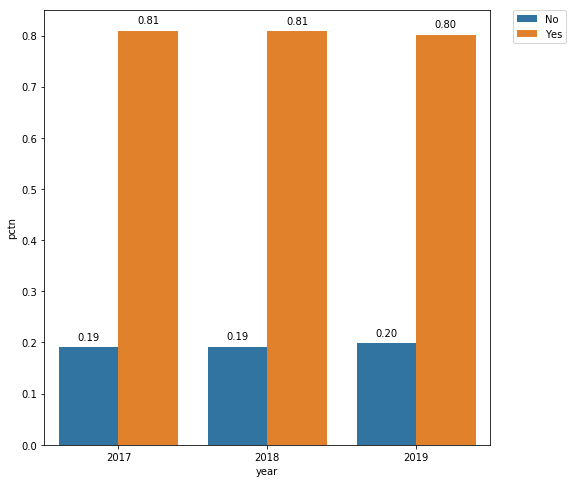

In [26]:
dims=(8,8)
fig,ax=plt.subplots(figsize=dims)
fig1=sns.barplot(ax=ax,x="year", y="pctn", hue="Hobbyist", data=survey_result_hobby)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for p in fig1.patches:
    fig1.annotate(format(p.get_height(), '.2f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [52]:
#let's take a look at the trend of who actually answers questions
survey_result_participation=pd.DataFrame(survey_result.groupby([survey_result.year,
                                                        survey_result.Hobbyist,
                                                       survey_result.SOPartFreq]).Respondent.nunique()).reset_index()
survey_result_participation.loc[~survey_result_participation['SOPartFreq'].str.contains('never'),'SOPartFreq']='Yes'
survey_result_participation.loc[survey_result_participation['SOPartFreq'].str.contains('never'),'SOPartFreq']='No'
survey_result_participation['pctn']=0
survey_result_participation.loc[survey_result_participation.year==2017,['pctn']]=survey_result_participation.Respondent/51392
survey_result_participation.loc[survey_result_participation.year==2018,['pctn']]=survey_result_participation.Respondent/98855
survey_result_participation.loc[survey_result_participation.year==2019,['pctn']]=survey_result_participation.Respondent/88883
survey_result_partic=survey_result_participation.groupby(['year', 'Hobbyist', 'SOPartFreq'], as_index=False).sum()
survey_result_partic


,year,Hobbyist,SOPartFreq,Respondent,pctn
0,2017,No,No,4099,0.079759
1,2017,No,Yes,1762,0.034285
2,2017,Yes,No,15295,0.297614
3,2017,Yes,Yes,12400,0.241283
4,2018,No,No,2276,0.023024
5,2018,No,Yes,9090,0.091953
6,2018,Yes,No,9117,0.092226
7,2018,Yes,Yes,45257,0.457812
8,2019,No,No,3669,0.041279
9,2019,No,Yes,10263,0.115466


In [58]:
survey_result_partic.pivot_table(values='pctn', index=survey_result_partic.year, 
                                 columns=['Hobbyist','SOPartFreq'], aggfunc='first')

Hobbyist          No                 Yes          
SOPartFreq        No       Yes        No       Yes
year                                              
2017        0.079759  0.034285  0.297614  0.241283
2018        0.023024  0.091953  0.092226  0.457812
2019        0.041279  0.115466  0.153213  0.530383

In [28]:
#now let's look at career satisfication and major trends
survey_result_career=pd.DataFrame(survey_result.groupby([survey_result.year,survey_result.CareerSatisfaction]).Respondent.nunique()).reset_index()
survey_result_career['pctn']=0
survey_result_career.loc[survey_result_career.year==2017,['pctn']]=survey_result_career.Respondent/51392
survey_result_career.loc[survey_result_career.year==2018,['pctn']]=survey_result_career.Respondent/98855
survey_result_career.loc[survey_result_career.year==2019,['pctn']]=survey_result_career.Respondent/88883
survey_result_career.sort_values(by=['year','pctn'],inplace=True)
survey_result_career


,year,CareerSatisfaction,Respondent,pctn
2,2017,Moderately dissatisfied,1046,0.020353
0,2017,Extremely dissatisfied,1098,0.021365
5,2017,Slightly dissatisfied,1352,0.026308
4,2017,Neither satisfied nor dissatisfied,3070,0.059737
6,2017,Slightly satisfied,4721,0.091863
3,2017,Moderately satisfied,9384,0.182597
1,2017,Extremely satisfied,22024,0.428549
7,2018,Extremely dissatisfied,2613,0.026433
9,2018,Moderately dissatisfied,5262,0.053229
11,2018,Neither satisfied nor dissatisfied,6316,0.063892


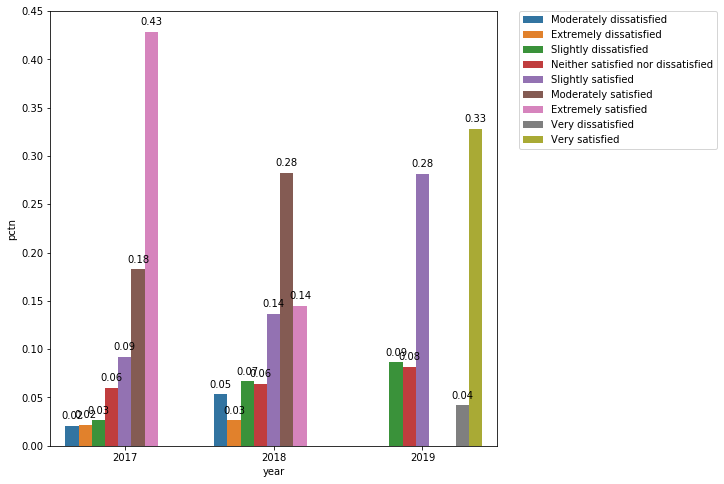

In [29]:
dims=(8,8)
fig,ax=plt.subplots(figsize=dims)
fig1=sns.barplot(ax=ax,x="year", y="pctn", hue="CareerSatisfaction", data=survey_result_career)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for p in fig1.patches:
    fig1.annotate(format(p.get_height(), '.2f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

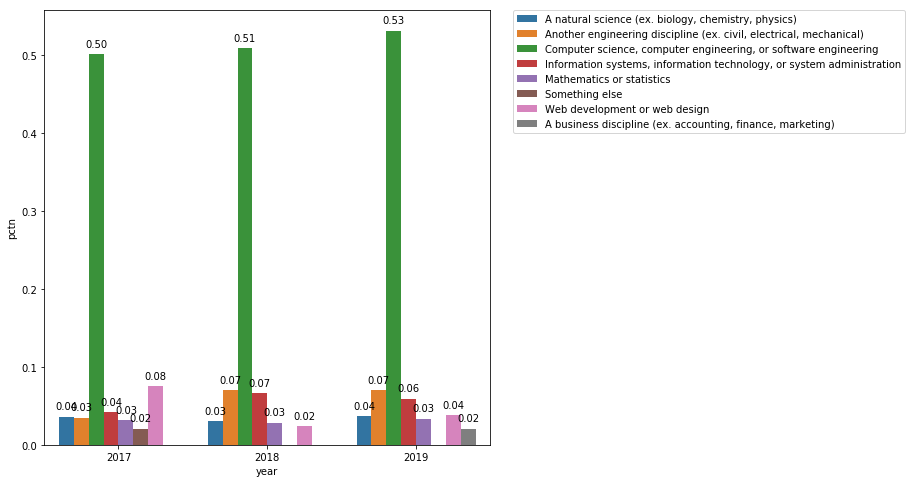

In [46]:
survey_result_major=pd.DataFrame(survey_result.groupby([survey_result.year,survey_result.UndergradMajor]).Respondent.nunique()).reset_index()
survey_result_major['pctn']=0
survey_result_major.loc[survey_result_major.year==2017,['pctn']]=survey_result_major.Respondent/51392
survey_result_major.loc[survey_result_major.year==2018,['pctn']]=survey_result_major.Respondent/98855
survey_result_major.loc[survey_result_major.year==2019,['pctn']]=survey_result_major.Respondent/88883
survey_result_major=survey_result_major[survey_result_major.pctn>0.02]
survey_result_major.sort_values(by=['year','UndergradMajor','pctn'],ascending=True,inplace=True)
dims=(8,8)
fig,ax=plt.subplots(figsize=dims)
fig1=sns.barplot(ax=ax,x="year", y="pctn", hue="UndergradMajor", data=survey_result_major)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for p in fig1.patches:
    fig1.annotate(format(p.get_height(), '.2f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [ ]:
#generate word cloud for top major keywprds
comments=survey_result.loc[:,['UndergradMajor']]
text=comments.comment_text.values
wc=WordCloud(background_color='white',max_words=200,stopwords=STOPWORDS)
wc.generate(" ".join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis('off')
plt.title("toxic comments")
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)

plt.subplot(222)


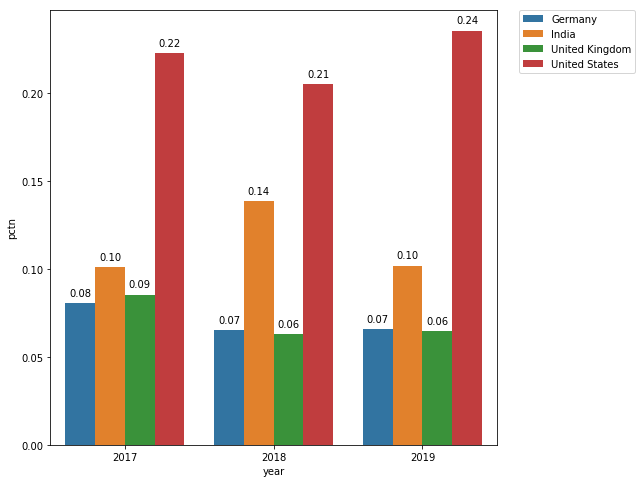

In [40]:
survey_result_country=pd.DataFrame(survey_result.groupby([survey_result.year,survey_result.Country]).Respondent.nunique()).reset_index()
survey_result_country['pctn']=0
survey_result_country.loc[survey_result_country.year==2017,['pctn']]=survey_result_country.Respondent/51392
survey_result_country.loc[survey_result_country.year==2018,['pctn']]=survey_result_country.Respondent/98855
survey_result_country.loc[survey_result_country.year==2019,['pctn']]=survey_result_country.Respondent/88883
survey_result_country=survey_result_country[survey_result_country.pctn>0.05]
dims=(8,8)
fig,ax=plt.subplots(figsize=dims)
fig1=sns.barplot(ax=ax,x="year", y="pctn", hue="Country", data=survey_result_country)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for p in fig1.patches:
    fig1.annotate(format(p.get_height(), '.2f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
